# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings

In [7]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [21]:
import os

In [23]:
os.getcwd()

'/Users/premachary/Downloads/Starter Notebook - EDA NYC Taxi'

In [542]:
# Try loading one file
os.chdir('/Users/premachary/Documents/yellow taxi assigment')
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [544]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
import pandas as pd

# Set the directory containing data files
os.chdir('/Users/premachary/Documents/yellow taxi assigment')

# Get the list of monthly Parquet files
file_list = [f for f in os.listdir() if f.endswith('.parquet')]  # Only Parquet files

# Initialize an empty dataframe to store final yearly data
df_final = pd.DataFrame()

# Iterate through the monthly files
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the file (assuming Parquet format)
        df_month = pd.read_parquet(file_path)

        # Convert 'tpep_pickup_datetime' to datetime format if not already
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract unique dates
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date

        # Initialize a dataframe to store sampled data for the month
        df_sampled_month = pd.DataFrame()

        # Loop through each date
        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]

            # Loop through each hour
            for hour in range(24):
                df_hour = df_day[df_day['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the data
                df_sampled = df_hour.sample(frac=0.0075, random_state=42)  # Set random_state for reproducibility

                # Append to monthly sampled data
                df_sampled_month = pd.concat([df_sampled_month, df_sampled])

        # Append the monthly sampled data to the final dataframe
        df_final = pd.concat([df_final, df_sampled_month])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Final dataframe contains sampled data from the entire year
print(df_final.shape)  # Check the size of the final dataset


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [548]:
pd.set_option("display.max_column",None)
df_final.head()


""


In [ ]:
# Store the df in csv/parquet
df_final.to_csv('EDA_Assg_NYC_Taxi_Starter.csv',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
os.chdir('/Users/premachary/Documents/yellow taxi assigment')
df=pd.read_csv("EDA_Assg_NYC_Taxi_Starter.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,airport_fee
0,2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,...,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,2023-06-01,NaN
1,2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,...,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,2023-06-01,NaN
2,2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,...,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,2023-06-01,NaN
3,2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,...,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,2023-06-01,NaN
4,2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,...,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,2023-06-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287291,1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,...,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,2023-03-31,NaN
287292,2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,...,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0,2023-03-31,NaN
287293,2,2023-03-31 23:22:46,2023-03-31 23:34:12,1.0,2.21,1.0,N,234,237,1,...,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.0,2023-03-31,NaN
287294,2,2023-03-31 23:05:30,2023-03-31 23:32:04,3.0,6.39,1.0,N,236,129,2,...,1.0,0.5,0.00,0.00,1.0,36.70,2.5,0.0,2023-03-31,NaN


In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,airport_fee
0,2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,...,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,2023-06-01,NaN
1,2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,...,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,2023-06-01,NaN
2,2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,...,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,2023-06-01,NaN
3,2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,...,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,2023-06-01,NaN
4,2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,...,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,2023-06-01,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287296 entries, 0 to 287295
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               287296 non-null  int64  
 1   tpep_pickup_datetime   287296 non-null  object 
 2   tpep_dropoff_datetime  287296 non-null  object 
 3   passenger_count        277830 non-null  float64
 4   trip_distance          287296 non-null  float64
 5   RatecodeID             277830 non-null  float64
 6   store_and_fwd_flag     277830 non-null  object 
 7   PULocationID           287296 non-null  int64  
 8   DOLocationID           287296 non-null  int64  
 9   payment_type           287296 non-null  int64  
 10  fare_amount            287296 non-null  float64
 11  extra                  287296 non-null  float64
 12  mta_tax                287296 non-null  float64
 13  tip_amount             287296 non-null  float64
 14  tolls_amount           287296 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed
df.drop(columns=['date'], inplace=True)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.set_index('VendorID', inplace=True)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
VendorID,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.80,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,NaN
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.60,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,NaN
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.30,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,NaN
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.90,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,NaN
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.90,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.50,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,NaN
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.60,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0,NaN
2,2023-03-31 23:22:46,2023-03-31 23:34:12,1.0,2.21,1.0,N,234,237,1,13.50,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
df.Airport_fee.isnull().sum()

31953

In [20]:
# Combine the two airport fee columns
df['Airport_fee']=df['Airport_fee'].fillna(df['airport_fee'])
df=df.drop(columns={"airport_fee"})
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.80,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.60,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.30,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.90,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.90,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.50,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.60,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0
2,2023-03-31 23:22:46,2023-03-31 23:34:12,1.0,2.21,1.0,N,234,237,1,13.50,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [23]:
# check where values of fare amount are negative
df[df['fare_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:26:05,2023-06-01 00:26:21,1.0,0.03,1.0,N,234,107,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-8.00,-2.5,0.00
2,2023-06-01 05:53:58,2023-06-01 06:32:47,3.0,19.04,1.0,N,132,255,4,-73.0,-1.0,-0.5,0.0,0.0,-1.0,-77.25,0.0,-1.75
2,2023-06-01 07:18:27,2023-06-01 07:19:21,5.0,0.00,1.0,N,264,264,4,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.50,0.0,0.00
2,2023-06-01 10:51:56,2023-06-01 10:53:16,2.0,0.06,1.0,N,125,249,2,-3.7,0.0,-0.5,0.0,0.0,-1.0,-7.70,-2.5,0.00
2,2023-06-01 11:58:58,2023-06-01 12:06:30,3.0,1.23,1.0,N,68,90,4,-9.3,0.0,-0.5,0.0,0.0,-1.0,-13.30,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 14:03:27,2023-03-31 14:18:59,1.0,1.83,1.0,N,161,186,2,-14.9,0.0,-0.5,0.0,0.0,-1.0,-18.90,-2.5,0.00
2,2023-03-31 14:44:08,2023-03-31 14:44:18,2.0,0.00,1.0,N,132,132,4,-3.0,0.0,-0.5,0.0,0.0,-1.0,-5.75,0.0,-1.25
2,2023-03-31 19:30:20,2023-03-31 19:31:36,1.0,0.10,1.0,N,132,132,4,-3.7,-2.5,-0.5,0.0,0.0,-1.0,-8.95,0.0,-1.25


Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df["fare_amount"] < 0]

ratecode_counts = negative_fares["RatecodeID"].value_counts()
print(ratecode_counts)



RatecodeID
1.0    2513
2.0     206
5.0      43
3.0      29
4.0      15
Name: count, dtype: int64


In [28]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number'])
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()].tolist()

print("Columns with negative values:", negative_columns)


Columns with negative values: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [30]:
# fix these negative values

columns_to_fix = ["fare_amount", "extra", "mta_tax", "tip_amount", 
                  "tolls_amount", "improvement_surcharge", "total_amount","congestion_surcharge","Airport_fee"]

df[columns_to_fix] = df[columns_to_fix].clip(lower=0)


print((df[columns_to_fix] < 0).sum()) ##all negative values we converted a zero


fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [34]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean() * 100


print(missing_proportion)

tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.29486
trip_distance            0.00000
RatecodeID               3.29486
store_and_fwd_flag       3.29486
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.29486
Airport_fee              3.29486
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [37]:
# Display the rows with null values

null_rows = df[df.isnull().any(axis=1)]
print(null_rows)
# Impute NaN values in 'passenger_count'

df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

# Verify if missing values are removed
print(df['passenger_count'].isnull().sum())

         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
1         2023-06-01 00:13:39   2023-06-01 00:24:14              NaN   
2         2023-06-01 01:06:00   2023-06-01 01:19:00              NaN   
2         2023-06-01 06:32:00   2023-06-01 06:52:00              NaN   
2         2023-06-01 07:22:00   2023-06-01 07:49:00              NaN   
2         2023-06-01 07:00:19   2023-06-01 07:17:45              NaN   
...                       ...                   ...              ...   
2         2023-03-31 20:06:05   2023-03-31 20:31:46              NaN   
2         2023-03-31 21:29:19   2023-03-31 21:48:20              NaN   
1         2023-03-31 22:53:04   2023-03-31 23:00:01              NaN   
2         2023-03-31 22:46:00   2023-03-31 23:06:00              NaN   
2         2023-03-31 23:34:00   2023-03-31 23:51:00              NaN   

          trip_distance  RatecodeID store_and_fwd_flag  PULocat

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3297897844.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [41]:
df['RatecodeID'].isnull().sum()

9466

In [43]:
df['RatecodeID'].describe() ##here outlinar are there

count    277830.000000
mean          1.626232
std           7.327949
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [45]:
# Fix missing values in 'RatecodeID'

print(df['RatecodeID'].isnull().sum())
df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True) #as the null values are very less so i discussed to fill with median
print(df['RatecodeID'].isnull().sum())


9466
0


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1384557336.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True) #as the null values are very less so i discussed to fill with median


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [48]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()

9466

In [50]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    253860
0.0     23970
Name: count, dtype: int64

In [52]:
df.dropna(subset=['congestion_surcharge'], inplace=True)
df['congestion_surcharge'].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [57]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,277830,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000,277830.000000
mean,2023-07-02 01:35:00.069153536,1.371151,3.478787,1.626232,165.214318,164.218641,1.227758,19.555272,1.618594,0.490220,3.536487,0.587488,0.989105,28.579780,2.284311,0.140863
min,2023-01-01 00:02:19,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-01 22:34:00,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.750000,2.500000,0.000000
50%,2023-06-26 13:20:54,1.000000,1.770000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,20.930000,2.500000,0.000000
75%,2023-10-05 22:21:54.500000,1.000000,3.370000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.410000,0.000000,1.000000,30.600000,2.500000,0.000000
max,2023-12-31 23:54:57,8.000000,9674.280000,99.000000,265.000000,265.000000,4.000000,715.600000,11.750000,0.800000,126.350000,77.000000,1.000000,724.150000,2.500000,1.750000
std,NaN,0.892372,19.080454,7.327949,63.747209,69.762815,0.520149,18.564274,1.832207,0.069263,4.041090,2.157514,0.103381,23.188465,0.701928,0.461566


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [62]:
# remove passenger_count > 6
df1=df[df['passenger_count']<6]
df1

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0


In [66]:
# Continue with outlier handling
import numpy as np
df2 = df1[~((df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) & 
          (df1['PULocationID'] != df1['DOLocationID']))]  #Removed trips where trip_distance and fare_amount are 0 but pickup & dropoff zones are different

df3 = df2[df2['trip_distance'] <= 250]
df3['tip_amount']=np.where((df3['tip_amount']>90),90,df3.tip_amount) ## here i given a cap of 90 
df3

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1251481176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tip_amount']=np.where((df3['tip_amount']>90),90,df3.tip_amount) ## here i given a cap of 90


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0


In [68]:
# Do any columns need standardising?
print(df3[['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']].describe())
# as mean and std values are not large so standardising is not required

       trip_distance    fare_amount   total_amount     tip_amount
count  275408.000000  275408.000000  275408.000000  275408.000000
mean        3.440327      19.559961      28.586904       3.536556
std         4.582426      18.579364      23.206082       4.035167
min         0.000000       0.000000       0.000000       0.000000
25%         1.040000       9.300000      15.750000       1.000000
50%         1.770000      13.500000      20.930000       2.800000
75%         3.370000      21.900000      30.600000       4.410000
max       209.800000     715.600000     724.150000      90.000000


In [70]:
df3['pickup_mins']=pd.to_datetime(df3['tpep_pickup_datetime']).dt.strftime('%H:%M:%S')
df3

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1860570168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pickup_mins']=pd.to_datetime(df3['tpep_pickup_datetime']).dt.strftime('%H:%M:%S')


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins
VendorID,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,00:20:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0,23:55:48


In [71]:
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['tpep_dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])

df3['trip_duration'] = (df3['tpep_dropoff_datetime'] - df3['tpep_pickup_datetime']).dt.total_seconds() / 60
df3

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3642682501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3642682501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tpep_dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3642682501.py:4: SettingWithCopyWarning: 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration
VendorID,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,00:20:44,18.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0,23:55:48,6.500000


In [74]:
df3=df3[df3['trip_duration']>=0]
df3

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration
VendorID,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.0,00:20:44,18.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,1.0,0.5,3.40,0.00,1.0,17.00,2.5,0.0,23:55:48,6.500000


In [76]:
# Define the upper cap (99th percentile)
upper_limit = df3['trip_duration'].quantile(0.99)  # 99% of trips are below this value

# Define the lower cap (avoid 0-minute trips unless valid)
lower_limit = 1  # Minimum trip should be at least 1 minute

# Apply capping
df3['trip_duration'] = np.where(df3['trip_duration'] > upper_limit, upper_limit, df3['trip_duration'])
df3['trip_duration'] = np.where(df3['trip_duration'] < lower_limit, lower_limit, df3['trip_duration'])

print(df3[['trip_duration']].describe())

       trip_duration
count  275402.000000
mean       16.146319
std        12.734695
min         1.000000
25%         7.533333
50%        12.466667
75%        20.450000
max        67.900000


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3222910331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['trip_duration'] = np.where(df3['trip_duration'] > upper_limit, upper_limit, df3['trip_duration'])
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3222910331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['trip_duration'] = np.where(df3['trip_duration'] < lower_limit, lower_limit, df3['trip_duration'])


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [79]:
df3.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_mins',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1666072986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pickup_hour'] = df3['tpep_pickup_datetime'].dt.hour


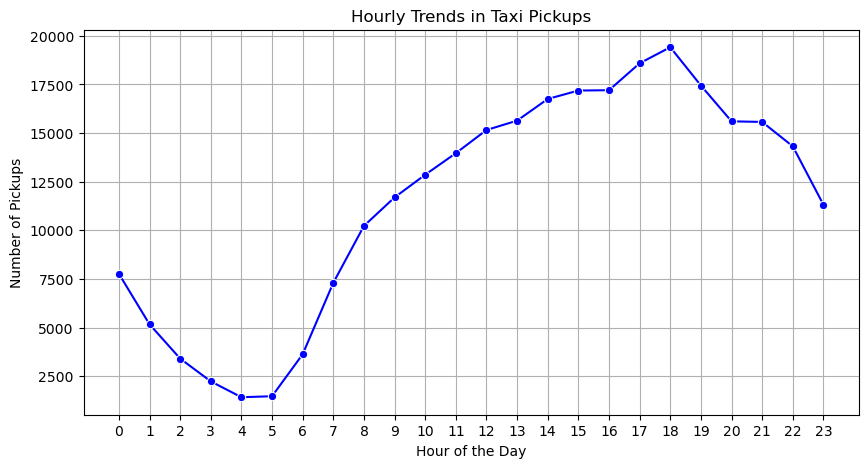

In [85]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns

df3['pickup_hour'] = df3['tpep_pickup_datetime'].dt.hour

hourly_trends = df3.groupby('pickup_hour').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, marker='o', color='b')

plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))  # Show all 24 hours
plt.grid()
plt.show()


In [86]:
df3

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,...,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,...,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,...,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,...,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0
2,2023-06-01 00:20:44,2023-06-01 00:39:33,1.0,4.34,1.0,N,230,7,2,21.9,...,0.5,0.00,0.00,1.0,26.90,2.5,0.0,00:20:44,18.816667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,...,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,...,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23
2,2023-03-31 23:55:48,2023-04-01 00:02:18,1.0,1.41,1.0,N,107,162,1,8.6,...,0.5,3.40,0.00,1.0,17.00,2.5,0.0,23:55:48,6.500000,23


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/620830329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pickup_day'] = df3['tpep_pickup_datetime'].dt.dayofweek
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/620830329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pickup_day'] = df3['pickup_day'].map(days_map)
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/620830329.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is d

Number of Pickups per Day:
 pickup_day
Monday       34496
Tuesday      39934
Wednesday    42282
Thursday     43209
Friday       40836
Saturday     40056
Sunday       34589
Name: count, dtype: int64


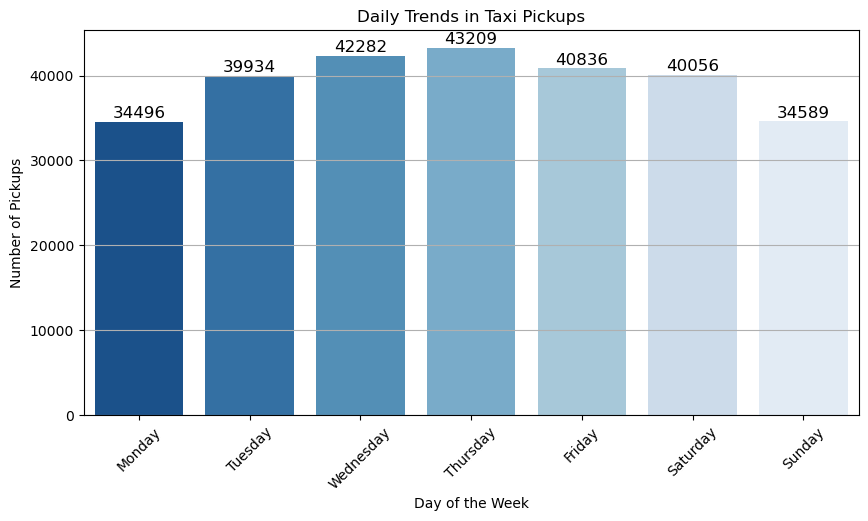

In [87]:
df3['pickup_day'] = df3['tpep_pickup_datetime'].dt.dayofweek

days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df3['pickup_day'] = df3['pickup_day'].map(days_map)

daily_trends = df3['pickup_day'].value_counts().reindex(days_map.values())

# Print the number of pickups per day
print("Number of Pickups per Day:\n", daily_trends)

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_trends.index, y=daily_trends.values, palette='Blues_r')

# Add numbers on top of bars
for index, value in enumerate(daily_trends.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=12)

plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/381258676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pickup_month'] = df3['tpep_pickup_datetime'].dt.month
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/381258676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='Blues_r')


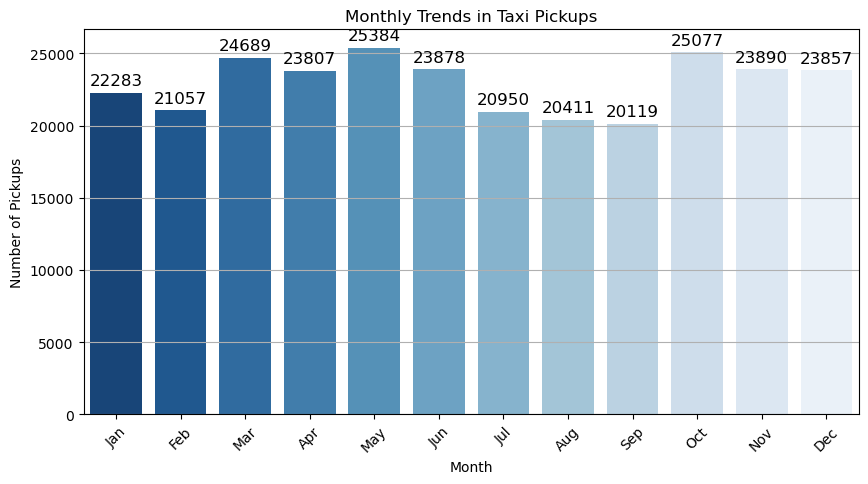

In [91]:
# Show the monthly trends in pickups
df3['pickup_month'] = df3['tpep_pickup_datetime'].dt.month
monthly_trend = df3['pickup_month'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='Blues_r')


for index, value in enumerate(monthly_trend.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=12)


plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

plt.grid(axis='y')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [95]:
# Analyse the above parameters
# List of financial columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Count zero values
zero_values = (df3[columns_to_check] == 0).sum()
zero_values

fare_amount       2877
tip_amount       63837
total_amount      2843
trip_distance     3729
dtype: int64

In [97]:
negative_values = (df3[columns_to_check] < 0).sum()
negative_values

fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [101]:
# Create a df with non zero entries for the selected parameters.
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df = df3[(df3[columns_to_check] != 0).all(axis=1)]
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,...,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,...,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,...,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,...,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,...,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,...,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,...,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,...,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1990909651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='Blues_r')


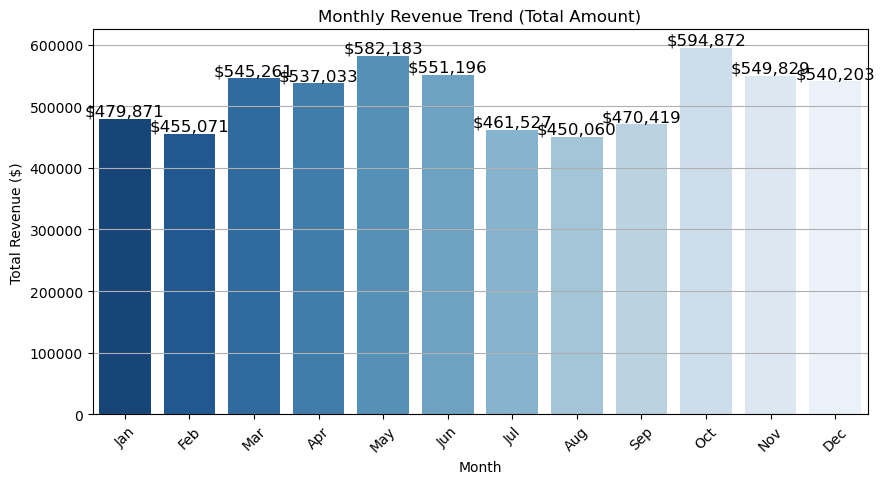

In [104]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
# Plot the revenue trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='Blues_r')

# Add number labels on top of bars
for index, value in enumerate(monthly_revenue.values):
    plt.text(index, value + 5000, f"${value:,.0f}", ha='center', fontsize=12)

# Formatting the plot
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

plt.grid(axis='y')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportion (%):
 pickup_quarter
1    23.806961
2    26.866182
3    22.227591
4    27.099266
Name: total_amount, dtype: float64


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3598295996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter


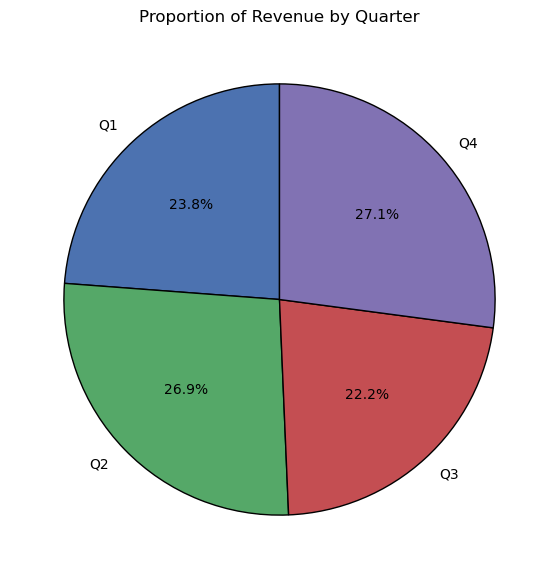

In [107]:
# Calculate proportion of each quarter

# Extract quarter from pickup datetime
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum total_amount
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()

# Calculate proportion
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Print the proportions
print("Quarterly Revenue Proportion (%):\n", quarterly_proportion)

# Plot the quarterly revenue proportion
plt.figure(figsize=(7, 7))
plt.pie(quarterly_proportion, labels=['Q1', 'Q2', 'Q3', 'Q4'], 
        autopct='%1.1f%%', colors=['#4c72b0', '#55a868', '#c44e52', '#8172b3'], 
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Revenue by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

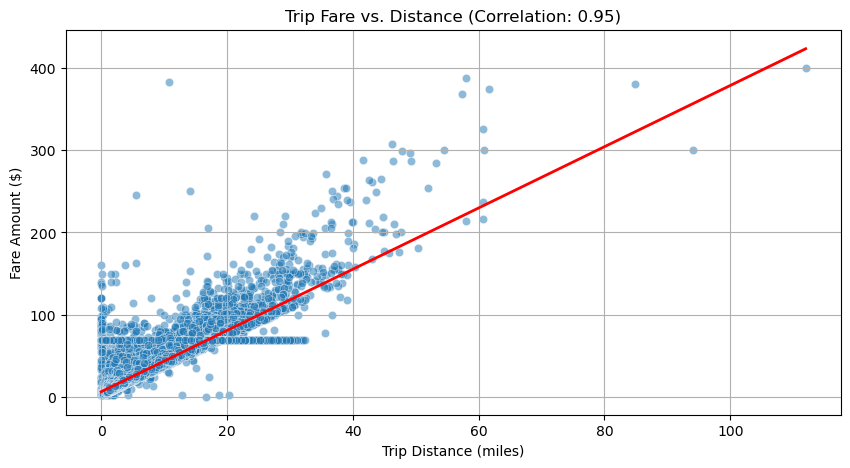

In [110]:
# Show how trip fare is affected by distance

# Scatter plot: Fare vs. Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5)

# Fit a regression line
sns.regplot(x=df['trip_distance'], y=df['fare_amount'], 
            scatter=False, color='red', line_kws={"linewidth":2})

# Calculate correlation
correlation = df[['trip_distance', 'fare_amount']].corr().iloc[0, 1]

# Formatting the plot
plt.title(f'Trip Fare vs. Distance (Correlation: {correlation:.2f})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

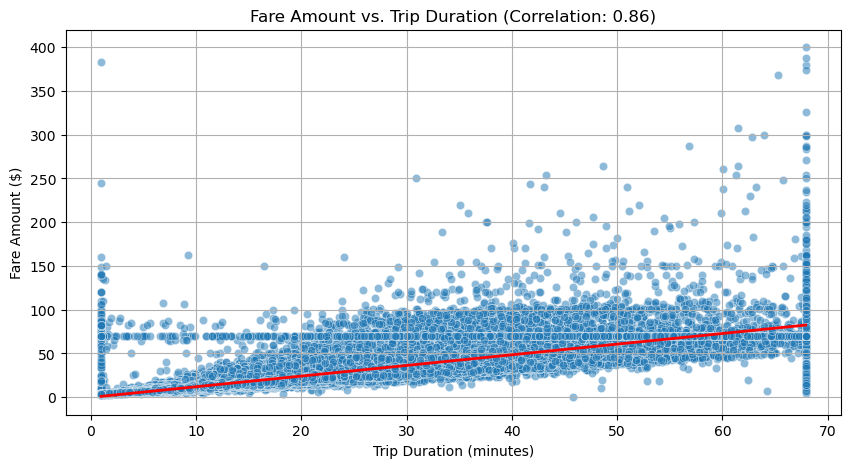

In [112]:
# Show relationship between fare and trip duration
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_duration'], y=df['fare_amount'], alpha=0.5)

# Fit a regression line
sns.regplot(x=df['trip_duration'], y=df['fare_amount'], 
            scatter=False, color='red', line_kws={"linewidth":2})

# Calculate correlation
correlation = df[['trip_duration', 'fare_amount']].corr().iloc[0, 1]

# Formatting the plot
plt.title(f'Fare Amount vs. Trip Duration (Correlation: {correlation:.2f})')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/3492103919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette="Blues")


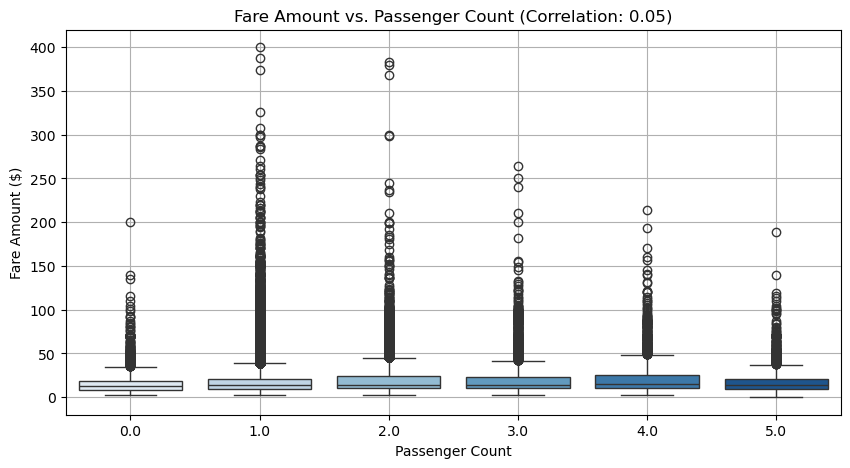

In [114]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 5))

# Boxplot 
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette="Blues")

# Compute correlation
correlation = df[['passenger_count', 'fare_amount']].corr().iloc[0, 1]


plt.title(f'Fare Amount vs. Passenger Count (Correlation: {correlation:.2f})')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()



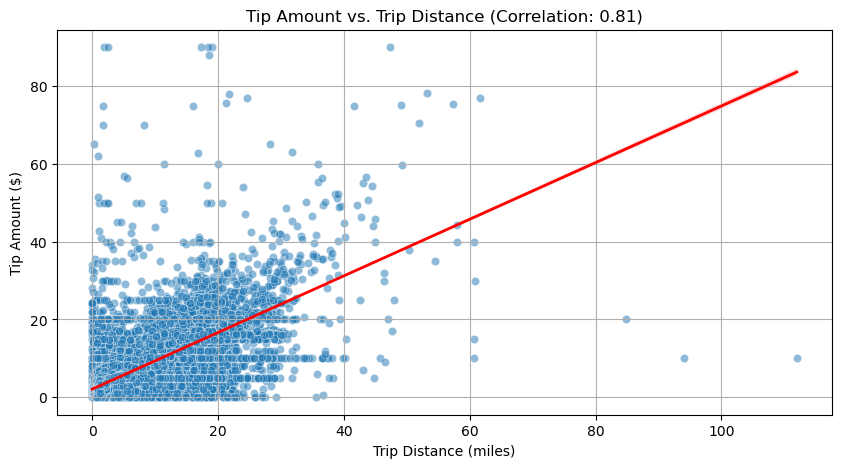

In [116]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 5))

sns.scatterplot(x=df['trip_distance'], y=df['tip_amount'], alpha=0.5)

sns.regplot(x=df['trip_distance'], y=df['tip_amount'], 
            scatter=False, color='red', line_kws={"linewidth":2})

correlation = df[['trip_distance', 'tip_amount']].corr().iloc[0, 1]

plt.title(f'Tip Amount vs. Trip Distance (Correlation: {correlation:.2f})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [137]:
# Analyse the distribution of different payment types (payment_type).
df.payment_type.value_counts()

payment_type
1    210252
2         3
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [118]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [165]:
os.chdir('/Users/premachary/Documents/yellow taxi assigment/Datasets and Dictionary/taxi_zones')
os.getcwd()

'/Users/premachary/Documents/yellow taxi assigment/Datasets and Dictionary/taxi_zones'

In [171]:
ls

taxi_zones.dbf      taxi_zones.sbn      taxi_zones.shp      taxi_zones.shx
taxi_zones.prj      taxi_zones.sbx      taxi_zones.shp.xml


In [219]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp")
zones.head(5)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [184]:
zones.shape

(263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [186]:
print(zones.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

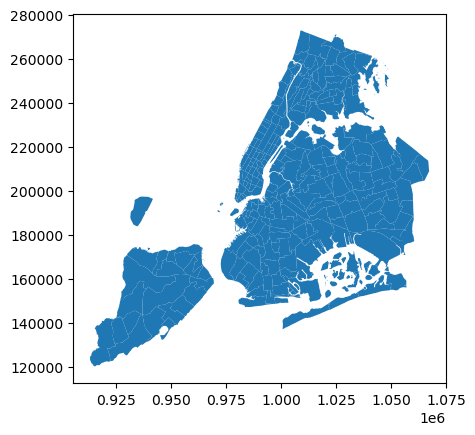

In [188]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [202]:
zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [204]:
# Merge zones and trip records using locationID and PULocationID
merged_df=zones.merge(df,left_on='LocationID',right_on='PULocationID',how='left')
merged_df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-06-07 00:05:19,2023-06-07 00:27:48,3.0,...,1.0,117.66,0.0,0.0,00:05:19,22.483333,0.0,Wednesday,6.0,2.0
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-04-02 17:15:34,2023-04-02 17:15:57,1.0,...,1.0,131.00,0.0,0.0,17:15:34,1.000000,17.0,Sunday,4.0,2.0
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-01-02 14:31:24,2023-01-02 14:32:47,1.0,...,1.0,140.00,0.0,0.0,14:31:24,1.383333,14.0,Monday,1.0,1.0
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-10-21 13:53:47,2023-10-21 13:54:12,4.0,...,1.0,116.00,0.0,0.0,13:53:47,1.000000,13.0,Saturday,10.0,4.0
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-12-01 11:59:57,2023-12-01 12:06:50,1.0,...,1.0,130.98,0.0,0.0,11:59:57,6.883333,11.0,Friday,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208504,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 20:45:30,2023-03-31 20:52:56,3.0,...,1.0,17.16,2.5,0.0,20:45:30,7.433333,20.0,Friday,3.0,1.0
208505,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 22:10:07,2023-03-31 22:28:17,1.0,...,1.0,31.90,2.5,0.0,22:10:07,18.166667,22.0,Friday,3.0,1.0
208506,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 23:33:29,2023-03-31 23:40:35,1.0,...,1.0,17.15,2.5,0.0,23:33:29,7.100000,23.0,Friday,3.0,1.0
208507,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 23:54:58,2023-04-01 00:03:34,1.0,...,1.0,18.85,2.5,0.0,23:54:58,8.600000,23.0,Friday,3.0,1.0


In [215]:
pd.set_option("display.max_column",None)
merged_df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-06-07 00:05:19,2023-06-07 00:27:48,3.0,15.71,3.0,N,1.0,6.0,1.0,78.30,1.0,0.0,19.61,17.75,1.0,117.66,0.0,0.0,00:05:19,22.483333,0.0,Wednesday,6.0,2.0
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-04-02 17:15:34,2023-04-02 17:15:57,1.0,1.50,5.0,N,1.0,1.0,1.0,110.00,0.0,0.0,20.00,0.00,1.0,131.00,0.0,0.0,17:15:34,1.000000,17.0,Sunday,4.0,2.0
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-01-02 14:31:24,2023-01-02 14:32:47,1.0,16.60,5.0,N,1.0,1.0,1.0,134.00,0.0,0.0,5.00,0.00,1.0,140.00,0.0,0.0,14:31:24,1.383333,14.0,Monday,1.0,1.0
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-10-21 13:53:47,2023-10-21 13:54:12,4.0,0.80,5.0,N,1.0,1.0,1.0,105.00,0.0,0.0,10.00,0.00,1.0,116.00,0.0,0.0,13:53:47,1.000000,13.0,Saturday,10.0,4.0
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2023-12-01 11:59:57,2023-12-01 12:06:50,1.0,0.01,5.0,N,1.0,264.0,1.0,108.15,0.0,0.0,21.83,0.00,1.0,130.98,0.0,0.0,11:59:57,6.883333,11.0,Friday,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208504,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 20:45:30,2023-03-31 20:52:56,3.0,1.40,1.0,N,263.0,237.0,1.0,9.30,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,20:45:30,7.433333,20.0,Friday,3.0,1.0
208505,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 22:10:07,2023-03-31 22:28:17,1.0,5.60,1.0,N,263.0,79.0,1.0,25.40,3.5,0.5,1.50,0.00,1.0,31.90,2.5,0.0,22:10:07,18.166667,22.0,Friday,3.0,1.0
208506,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 23:33:29,2023-03-31 23:40:35,1.0,1.20,1.0,N,263.0,239.0,1.0,9.30,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.0,23:33:29,7.100000,23.0,Friday,3.0,1.0
208507,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",2023-03-31 23:54:58,2023-04-01 00:03:34,1.0,1.90,1.0,N,263.0,233.0,1.0,10.70,3.5,0.5,3.15,0.00,1.0,18.85,2.5,0.0,23:54:58,8.600000,23.0,Friday,3.0,1.0


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [217]:
# Group data by location and calculate the number of trips
trip_counts = merged_df["PULocationID"].value_counts().reset_index()
trip_counts.columns = ["LocationID", "TotalTrips"]
trip_counts


,LocationID,TotalTrips
0,237.0,10355
1,161.0,9982
2,236.0,9527
3,132.0,9495
4,162.0,7745
...,...,...
156,184.0,1
157,29.0,1
158,188.0,1
159,200.0,1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

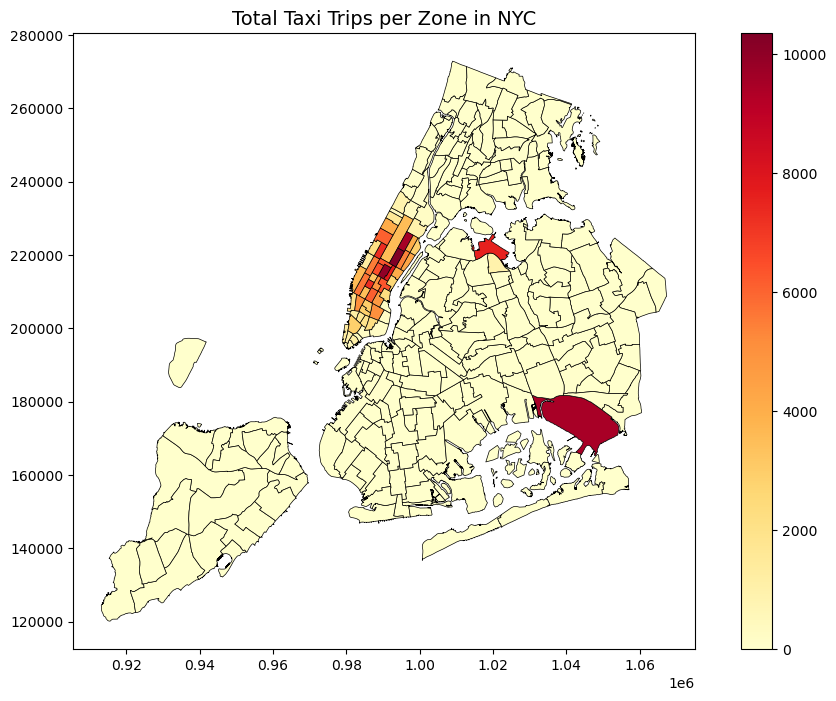

In [225]:
# Merge trip counts back to the zones GeoDataFrame
zones_gdf = gpd.read_file("taxi_zones.shp")  # Replace with correct path

zones_gdf = zones_gdf.merge(trip_counts, left_on="LocationID", right_on="LocationID", how="left")

zones_gdf["TotalTrips"] = zones_gdf["TotalTrips"].fillna(0)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_gdf.plot(column="TotalTrips", cmap="YlOrRd", linewidth=0.5, edgecolor="black", legend=True, ax=ax)
ax.set_title("Total Taxi Trips per Zone in NYC", fontsize=14)
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

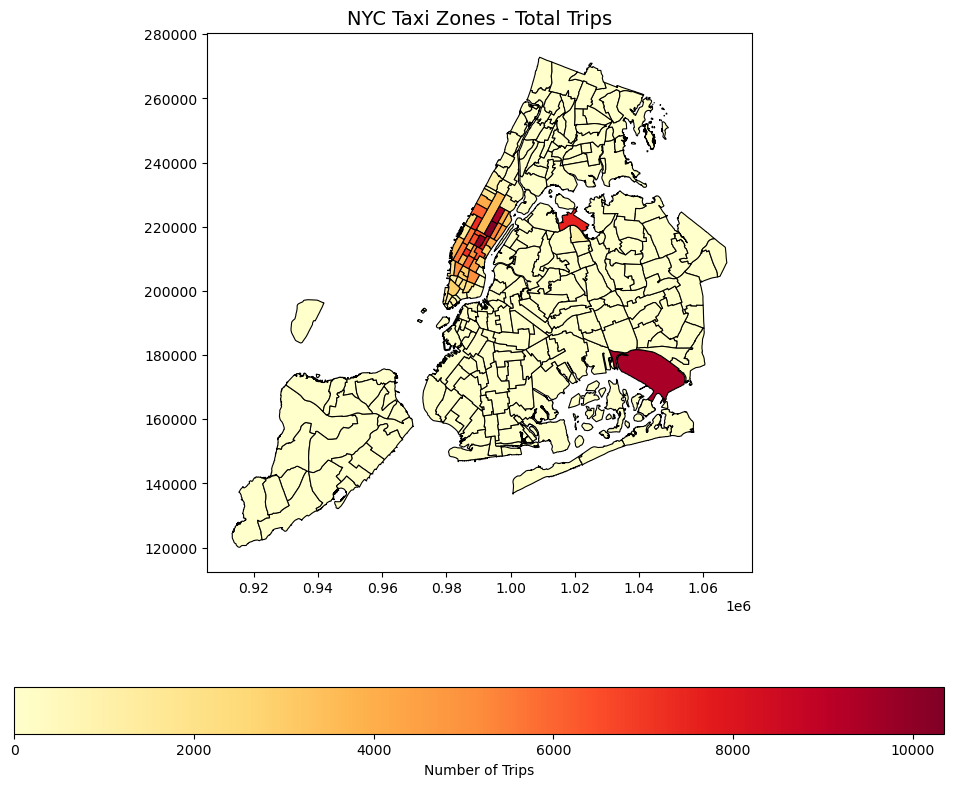

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame
zones_gdf.plot(
    column="TotalTrips",  # Color zones based on trip count
    cmap="YlOrRd",        # Color scale (Yellow-Orange-Red)
    linewidth=0.8, 
    edgecolor="black",
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"},
    ax=ax
)

# Set title
ax.set_title("NYC Taxi Zones - Total Trips", fontsize=14)

# Show the plot
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

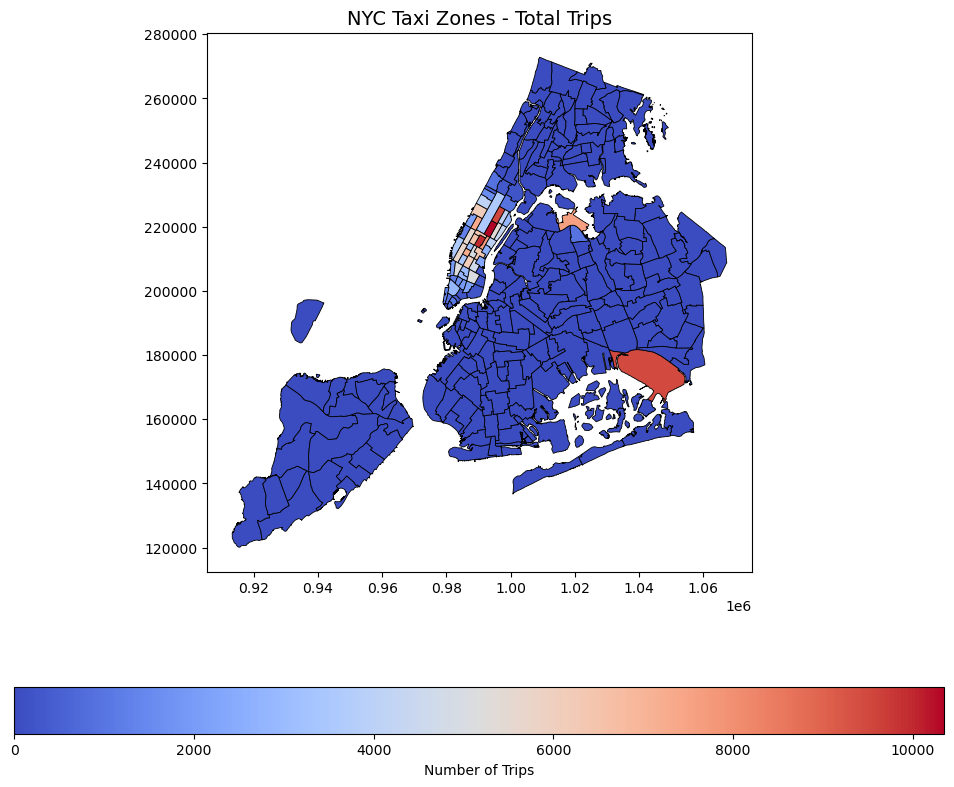

In [232]:
# Define figure and axis


# Plot the map and display it

fig, ax = plt.subplots(1, 1, figsize=(12, 10))


zones_gdf.plot(
    column="TotalTrips",  
    cmap="coolwarm",      
    linewidth=0.6, 
    edgecolor="black",
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"},
    ax=ax
)


ax.set_title("NYC Taxi Zones - Total Trips", fontsize=14)


plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [269]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_hours,speed_mph
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6,2,0.627222,20.869796
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6,2,0.080278,19.806228
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6,2,0.106944,15.615584
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6,2,0.169444,19.121311
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6,2,0.212500,11.388235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3,1,0.155278,7.792487
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3,1,0.214167,6.070039
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3,1,0.321389,10.890233


In [267]:
# Find routes which have the slowest speeds at different times of the day

# Convert trip duration from minutes to hours
df['trip_duration_hours'] = df['trip_duration'] / 60  

df['speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

df = df.replace([float('inf'), -float('inf')], None).dropna()

route_speed = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_trip_duration=('trip_duration_hours', 'mean'),
    total_distance=('trip_distance', 'sum')
).reset_index()

route_speed['speed_mph'] = route_speed['total_distance'] / route_speed['avg_trip_duration']

slowest_routes = route_speed.groupby('pickup_hour').apply(lambda x: x.nsmallest(1, 'speed_mph')).reset_index(drop=True)
slowest_routes

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/912941890.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slowest_routes = route_speed.groupby('pickup_hour').apply(lambda x: x.nsmallest(1, 'speed_mph')).reset_index(drop=True)


,PULocationID,DOLocationID,pickup_hour,avg_trip_duration,total_distance,speed_mph
0,41,41,0,0.016667,0.01,0.600000
1,90,90,1,0.059444,0.10,1.682243
2,265,264,2,0.016667,0.02,1.200000
3,45,144,3,0.088056,0.44,4.996845
4,141,75,4,0.103889,0.20,1.925134
5,42,42,5,0.016667,0.02,1.200000
6,138,138,6,0.016667,0.03,1.800000
7,164,48,7,0.255556,0.99,3.873913
8,52,33,8,0.176389,0.62,3.514961
9,229,164,9,0.302222,1.10,3.639706


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/2731960945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")


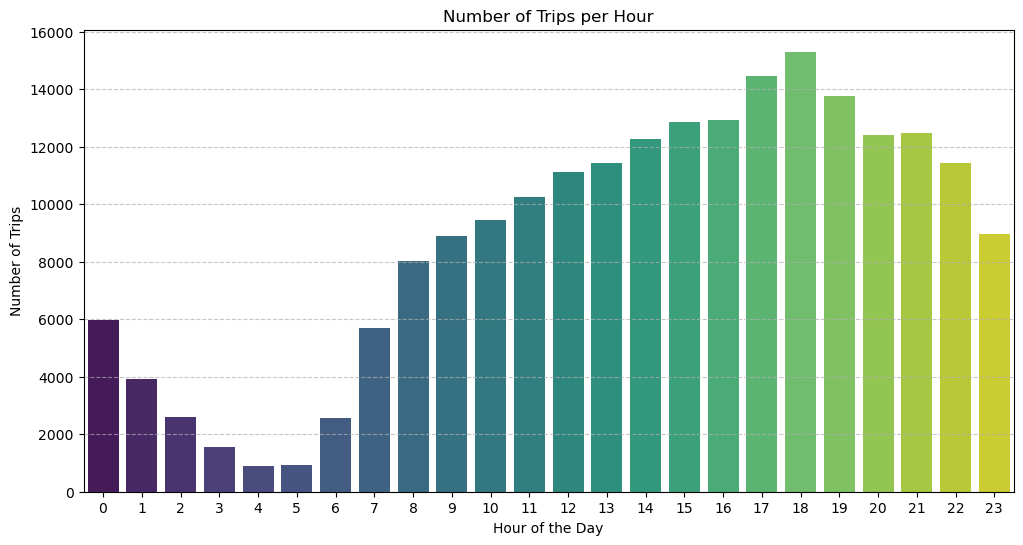

Busiest Hour: 18:00 with 15310 trips


In [271]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_hour_count = hourly_trips.max()

print(f"Busiest Hour: {busiest_hour}:00 with {busiest_hour_count} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [277]:
# Scale up the number of trips
hourly_trips = df['pickup_hour'].value_counts().sort_index()

busiest_hours = hourly_trips.nlargest(5)
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1
scaled_trips = busiest_hours / sample_fraction

print("Top 5 Busiest Hours with Actual and Scaled Trip Counts:")
print(pd.DataFrame({'Actual Trips': busiest_hours, 'Scaled Trips': scaled_trips.astype(int)}))


Top 5 Busiest Hours with Actual and Scaled Trip Counts:
             Actual Trips  Scaled Trips
pickup_hour                            
18                  15310        153100
17                  14466        144660
19                  13786        137860
16                  12928        129280
15                  12849        128490


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [280]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_hours,speed_mph
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6,2,0.627222,20.869796
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6,2,0.080278,19.806228
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6,2,0.106944,15.615584
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6,2,0.169444,19.121311
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6,2,0.212500,11.388235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3,1,0.155278,7.792487
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3,1,0.214167,6.070039
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3,1,0.321389,10.890233


In [290]:
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_hours,speed_mph,day_type
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6,2,0.627222,20.869796,Weekday
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6,2,0.080278,19.806228,Weekday
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6,2,0.106944,15.615584,Weekday
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6,2,0.169444,19.121311,Weekday
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6,2,0.212500,11.388235,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3,1,0.155278,7.792487,Weekday
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3,1,0.214167,6.070039,Weekday
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3,1,0.321389,10.890233,Weekday


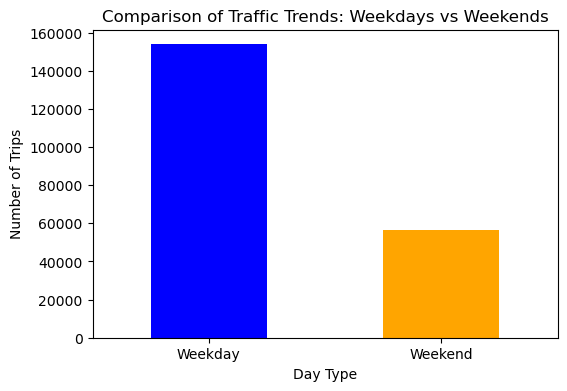

day_type
Weekday    153918
Weekend     56337
Name: count, dtype: int64


In [295]:


traffic_trends = df['day_type'].value_counts()


plt.figure(figsize=(6, 4))
traffic_trends.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("Comparison of Traffic Trends: Weekdays vs Weekends")
plt.xticks(rotation=0)
plt.show()

# Print trip counts
print(traffic_trends)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

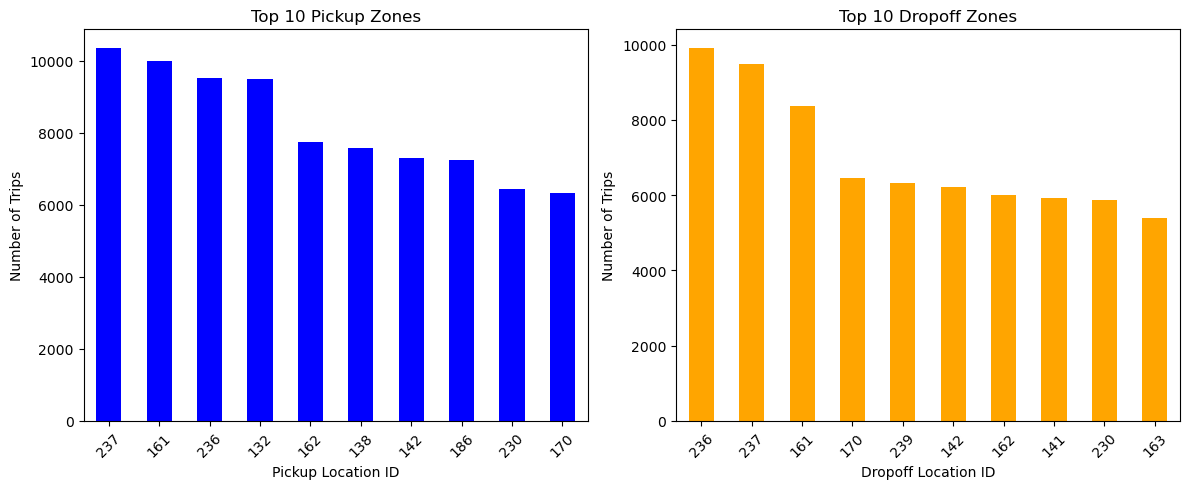

Top 10 Pickup Zones:
 PULocationID
237    10355
161     9982
236     9527
132     9495
162     7745
138     7590
142     7311
186     7254
230     6448
170     6341
Name: count, dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
236    9914
237    9496
161    8365
170    6469
239    6317
142    6212
162    6012
141    5939
230    5883
163    5384
Name: count, dtype: int64


In [297]:
# Find top 10 pickup and dropoff zones
# Top 10 Pickup Zones
top_pickup_zones = df['PULocationID'].value_counts().head(10)

# Top 10 Dropoff Zones
top_dropoff_zones = df['DOLocationID'].value_counts().head(10)

# Plot Top Pickup Zones
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_pickup_zones.plot(kind='bar', color='blue')
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Pickup Zones")
plt.xticks(rotation=45)

# Plot Top Dropoff Zones
plt.subplot(1, 2, 2)
top_dropoff_zones.plot(kind='bar', color='orange')
plt.xlabel("Dropoff Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Dropoff Zones")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print top pickup and dropoff zones
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Pickup/Dropoff Ratios:
 70     11.309524
132     4.684262
138     2.882643
215     2.100000
207     2.000000
186     1.649386
43      1.397476
249     1.355080
114     1.327389
162     1.288257
Name: count, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
 37     0.004854
188    0.006897
127    0.008333
92     0.011494
257    0.011628
225    0.012270
89     0.012658
228    0.012821
220    0.012821
1      0.013468
Name: count, dtype: float64


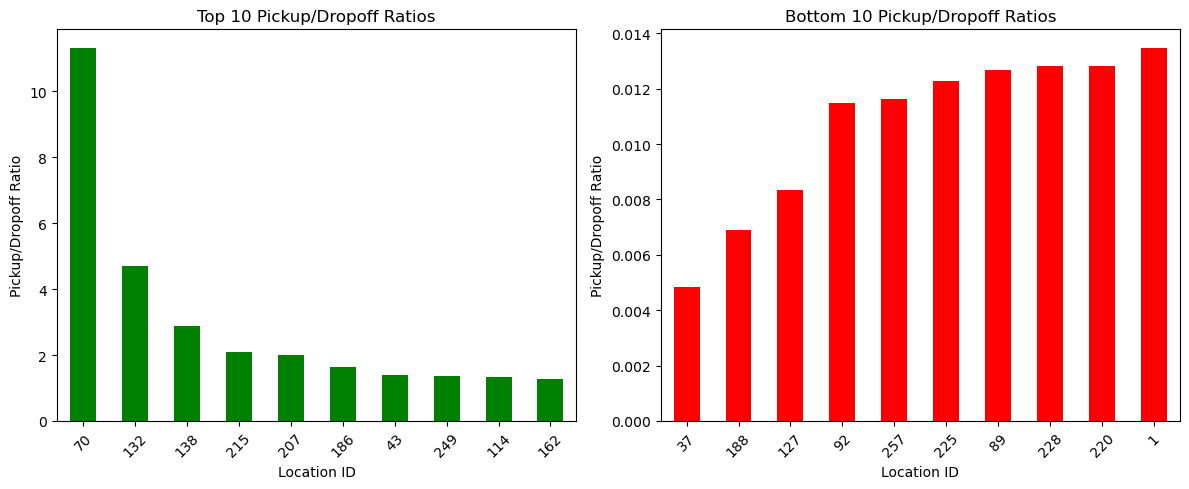

In [299]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()


ratios = (pickup_counts / dropoff_counts).dropna()


top_10_ratios = ratios.sort_values(ascending=False).head(10)
bottom_10_ratios = ratios.sort_values(ascending=True).head(10)


print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios)
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
top_10_ratios.plot(kind='bar', color='green')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
bottom_10_ratios.plot(kind='bar', color='red')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Nighttime Pickup Zones:
 PULocationID
79     1883
249    1546
132    1397
48     1229
148    1187
114    1067
230     866
186     785
164     727
107     725
Name: count, dtype: int64

Top 10 Nighttime Dropoff Zones:
 DOLocationID
79     1005
170     772
48      759
107     730
141     671
263     666
68      661
249     581
229     577
90      560
Name: count, dtype: int64


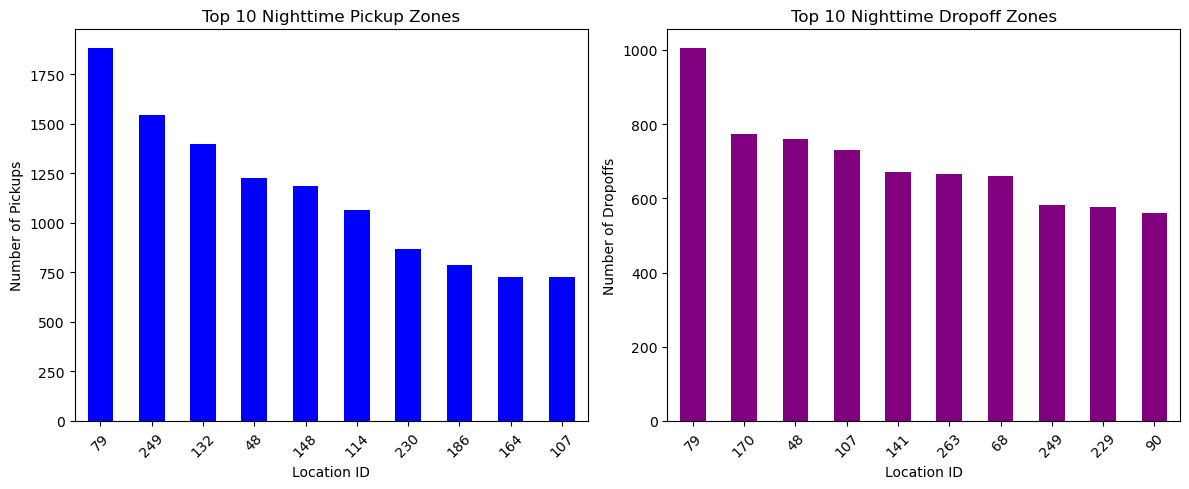

In [309]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter for Night Hours (11 PM - 5 AM)
night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]


night_pickup_counts = night_hours['PULocationID'].value_counts().head(10)
night_dropoff_counts = night_hours['DOLocationID'].value_counts().head(10)


print("Top 10 Nighttime Pickup Zones:\n", night_pickup_counts)
print("\nTop 10 Nighttime Dropoff Zones:\n", night_dropoff_counts)



plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
night_pickup_counts.plot(kind='bar', color='blue')
plt.xlabel("Location ID")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Nighttime Pickup Zones")
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
night_dropoff_counts.plot(kind='bar', color='purple')
plt.xlabel("Location ID")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Nighttime Dropoff Zones")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [311]:
# Filter for night hours (11 PM to 5 AM)

df_night = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]


print(df_night.head())


         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-06-01 00:35:13   2023-06-01 01:12:51              1.0   
2         2023-06-01 00:43:37   2023-06-01 00:48:26              1.0   
2         2023-06-01 00:13:18   2023-06-01 00:19:43              1.0   
2         2023-06-01 00:17:04   2023-06-01 00:27:14              1.0   
2         2023-06-01 00:42:14   2023-06-01 00:54:59              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                 13.09         1.0                  N           142   
2                  1.59         1.0                  N           249   
2                  1.67         1.0                  N           114   
2                  3.24         1.0                  N           170   
2                  2.42         1.0                  N         

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [313]:
# Analyse the fare per mile per passenger for different passenger counts


# Avoid division by zero (filter out trips with zero trip distance or zero passengers)
df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]

df_filtered['fare_per_mile_per_passenger'] = (df_filtered['fare_amount'] / df_filtered['trip_distance']) / df_filtered['passenger_count']


fare_analysis = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()


print(fare_analysis)


   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.515265
1              2.0                     5.415641
2              3.0                     3.163109
3              4.0                     5.261570
4              5.0                     1.527857


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/1896577719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile_per_passenger'] = (df_filtered['fare_amount'] / df_filtered['trip_distance']) / df_filtered['passenger_count']


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare Per Mile by Hour of the Day:
    pickup_hour  fare_per_mile
0             0      11.388220
1             1       8.826156
2             2       8.156200
3             3       6.428754
4             4       7.007423
5             5      14.430664
6             6       7.093701
7             7      10.752862
8             8       8.882270
9             9       8.845148
10           10      10.853570
11           11      10.548443
12           12       9.349034
13           13      10.907745
14           14      11.455065
15           15      11.978863
16           16      12.330298
17           17      12.275592
18           18       9.309492
19           19       8.446752
20           20       7.279985
21           21       8.289824
22           22       7.961852
23           23       8.895765

Average Fare Per Mile by Day of the Week:
  pickup_day  fare_per_mile
0     Friday      10.324936
1     Monday       9.576761
2   Saturday       9.758386
3     Sunday      11.016798


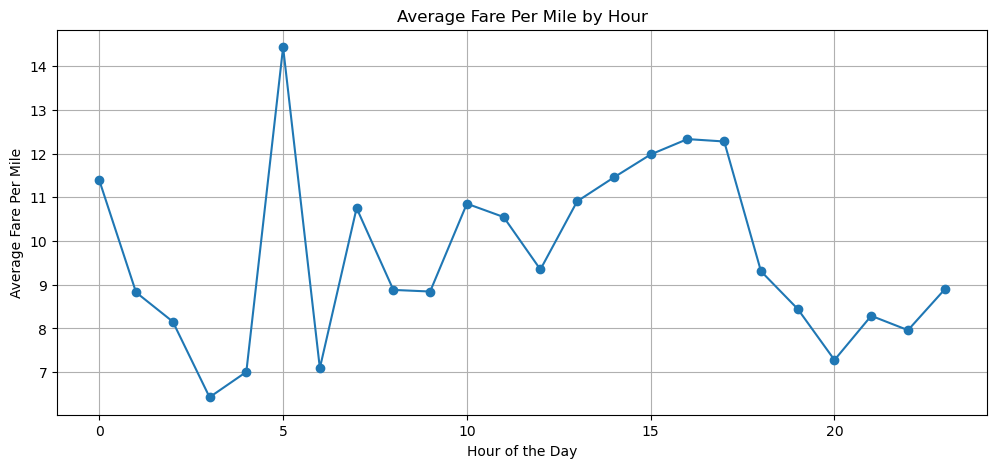

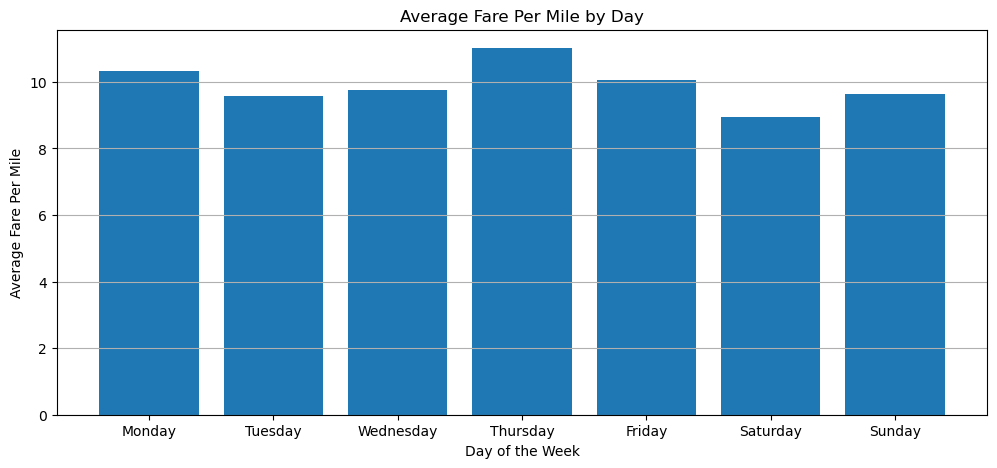

In [315]:
# Compare the average fare per mile for different days and for different times of the day
df_filtered = df[df['trip_distance'] > 0].copy()


df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


fare_per_mile_by_hour = df_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()


fare_per_mile_by_day = df_filtered.groupby('pickup_day')['fare_per_mile'].mean().reset_index()


print("Average Fare Per Mile by Hour of the Day:")
print(fare_per_mile_by_hour)

print("\nAverage Fare Per Mile by Day of the Week:")
print(fare_per_mile_by_day)





plt.figure(figsize=(12,5))
plt.plot(fare_per_mile_by_hour['pickup_hour'], fare_per_mile_by_hour['fare_per_mile'], marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile")
plt.title("Average Fare Per Mile by Hour")
plt.grid()
plt.show()


plt.figure(figsize=(12,5))
plt.bar(fare_per_mile_by_day['pickup_day'], fare_per_mile_by_day['fare_per_mile'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare Per Mile")
plt.title("Average Fare Per Mile by Day")
plt.xticks(ticks=range(0, 7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.grid(axis='y')
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare Per Mile by Vendor and Hour of the Day:
    pickup_hour  VendorID  fare_per_mile
0             0         1       7.090781
1             0         2      12.663161
2             1         1       6.507461
3             1         2       9.497921
4             2         1       6.746409
5             2         2       8.652781
6             3         1       6.139641
7             3         2       6.506988
8             4         1       6.238298
9             4         2       7.254082
10            5         1       5.707347
11            5         2      17.629642
12            6         1       6.376863
13            6         2       7.384438
14            7         1       7.065072
15            7         2      12.157310
16            8         1       8.214864
17            8         2       9.128133
18            9         1       8.758587
19            9         2       8.878168
20           10         1       8.233626
21           10         2      11.841487
22  

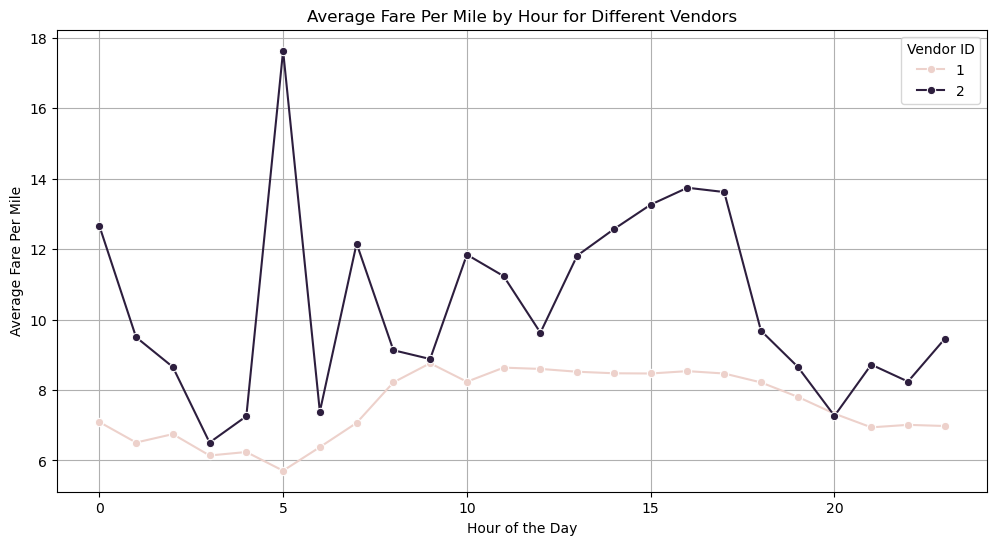

In [317]:
# Compare fare per mile for different vendors

df_filtered = df[df['trip_distance'] > 0].copy()


df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


fare_per_mile_by_vendor_hour = df_filtered.groupby(['pickup_hour', 'VendorID'])['fare_per_mile'].mean().reset_index()


print("Average Fare Per Mile by Vendor and Hour of the Day:")
print(fare_per_mile_by_vendor_hour)

plt.figure(figsize=(12,6))
sns.lineplot(data=fare_per_mile_by_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile")
plt.title("Average Fare Per Mile by Hour for Different Vendors")
plt.legend(title="Vendor ID")
plt.grid()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare Per Mile by Vendor and Distance Tier:
  distance_tier  VendorID  fare_per_mile
0     0-2 miles         1       9.535673
1     0-2 miles         2      14.562646
2     2-5 miles         1       6.377413
3     2-5 miles         2       6.541979
4      5+ miles         1       4.472065
5      5+ miles         2       4.509774


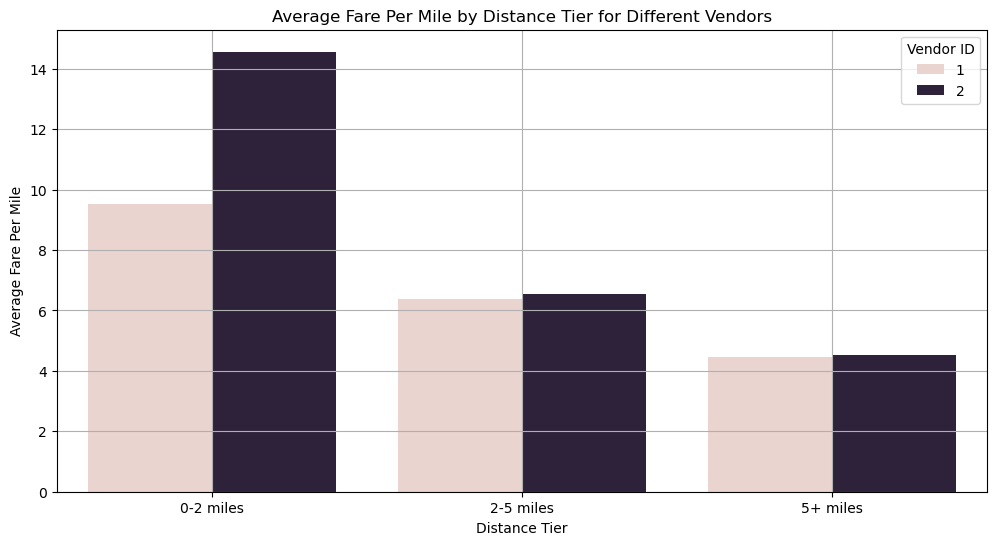

In [319]:
# Defining distance tiers

def distance_tier(distance):
    if distance <= 2:
        return "0-2 miles"
    elif 2 < distance <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"


df_filtered = df[df['trip_distance'] > 0].copy()

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


fare_per_mile_by_tier = df_filtered.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().reset_index()

print("Average Fare Per Mile by Vendor and Distance Tier:")
print(fare_per_mile_by_tier)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=fare_per_mile_by_tier, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare Per Mile")
plt.title("Average Fare Per Mile by Distance Tier for Different Vendors")
plt.legend(title="Vendor ID")
plt.grid()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [334]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_hours,speed_mph,day_type
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6,2,0.627222,20.869796,Weekday
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6,2,0.080278,19.806228,Weekday
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6,2,0.106944,15.615584,Weekday
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6,2,0.169444,19.121311,Weekday
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6,2,0.212500,11.388235,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3,1,0.155278,7.792487,Weekday
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3,1,0.214167,6.070039,Weekday
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3,1,0.321389,10.890233,Weekday


/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/384701092.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_filtered.groupby('distance_category')['tip_percentage'].mean().reset_index()
/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/384701092.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_distance, x="distance_category", y="tip_percentage", palette="viridis")


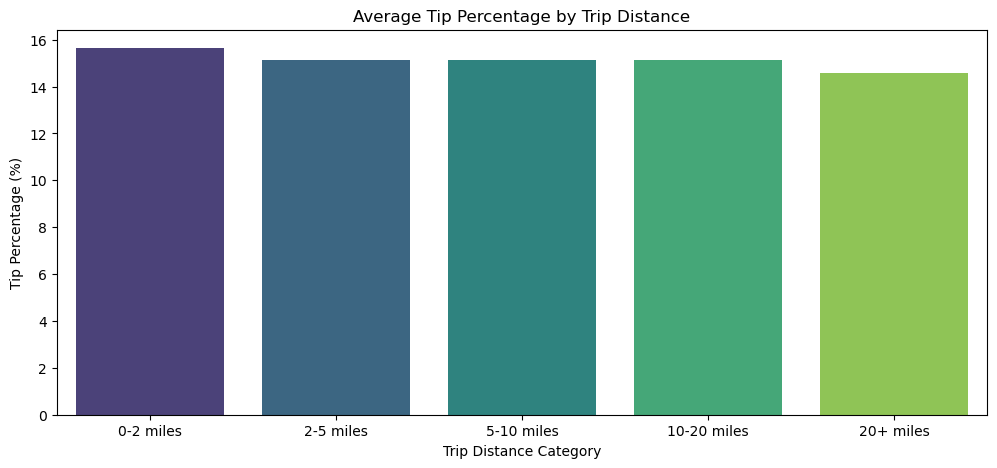

In [338]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered = df[df['total_amount'] > 0].copy()


df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100


df_filtered['distance_category'] = pd.cut(
    df_filtered['trip_distance'],
    bins=[0, 2, 5, 10, 20, np.inf],
    labels=["0-2 miles", "2-5 miles", "5-10 miles", "10-20 miles", "20+ miles"]
)

tip_by_distance = df_filtered.groupby('distance_category')['tip_percentage'].mean().reset_index()


plt.figure(figsize=(12, 5))
sns.barplot(data=tip_by_distance, x="distance_category", y="tip_percentage", palette="viridis")
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Trip Distance Category")
plt.ylabel("Tip Percentage (%)")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

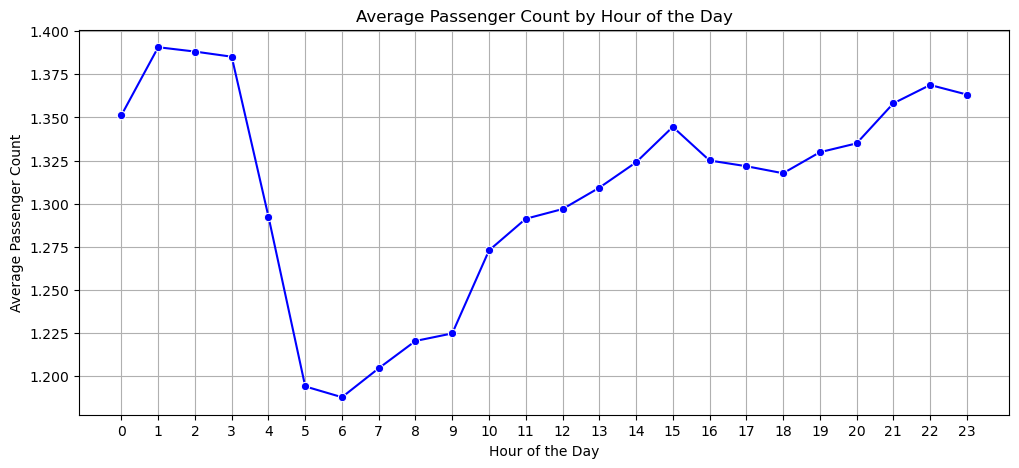

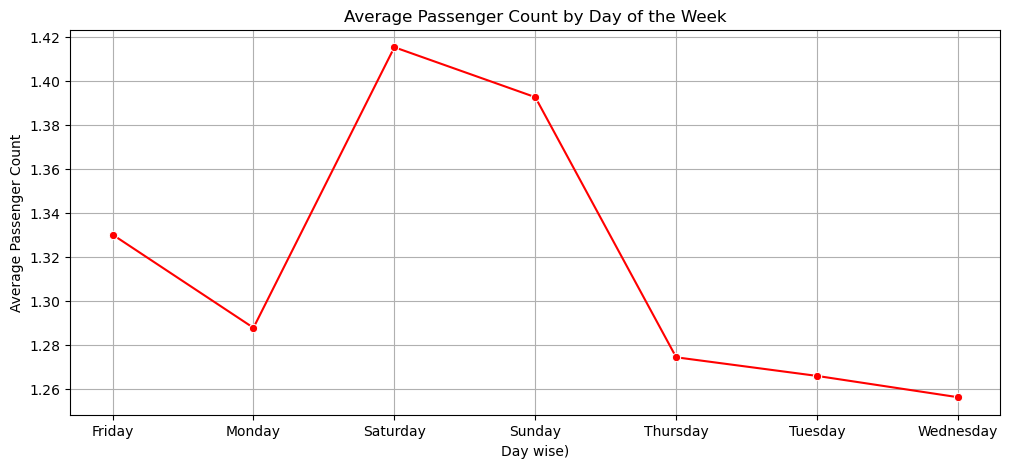

In [342]:
# See how passenger count varies across hours and days

# Group by pickup hour and calculate average passenger count
hourly_passenger_trend = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by day of the week and calculate average passenger count
daily_passenger_trend = df.groupby('pickup_day')['passenger_count'].mean().reset_index()

# Plot passenger count by pickup hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_passenger_trend, x="pickup_hour", y="passenger_count", marker="o", color="b")
plt.title("Average Passenger Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(24))  # Show all 24 hours on x-axis
plt.grid(True)
plt.show()

# Plot passenger count by day 
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_passenger_trend, x="pickup_day", y="passenger_count", marker="o", color="r")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day wise)")
plt.ylabel("Average Passenger Count")
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [354]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_mins,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_hours,speed_mph,day_type
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2023-06-01 00:35:13,2023-06-01 01:12:51,1.0,13.09,1.0,N,142,14,1,54.8,1.0,0.5,13.27,6.55,1.0,79.62,2.5,0.0,00:35:13,37.633333,0,Thursday,6,2,0.627222,20.869796,Weekday
2,2023-06-01 00:43:37,2023-06-01 00:48:26,1.0,1.59,1.0,N,249,107,1,8.6,1.0,0.5,2.72,0.00,1.0,16.32,2.5,0.0,00:43:37,4.816667,0,Thursday,6,2,0.080278,19.806228,Weekday
2,2023-06-01 00:13:18,2023-06-01 00:19:43,1.0,1.67,1.0,N,114,79,1,9.3,1.0,0.5,2.86,0.00,1.0,17.16,2.5,0.0,00:13:18,6.416667,0,Thursday,6,2,0.106944,15.615584,Weekday
2,2023-06-01 00:17:04,2023-06-01 00:27:14,1.0,3.24,1.0,N,170,263,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:17:04,10.166667,0,Thursday,6,2,0.169444,19.121311,Weekday
2,2023-06-01 00:42:14,2023-06-01 00:54:59,2.0,2.42,1.0,N,186,239,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.0,00:42:14,12.750000,0,Thursday,6,2,0.212500,11.388235,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023-03-31 23:12:01,2023-03-31 23:21:20,1.0,1.21,1.0,N,237,142,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,23:12:01,9.316667,23,Friday,3,1,0.155278,7.792487,Weekday
1,2023-03-31 23:08:49,2023-03-31 23:21:40,1.0,1.30,1.0,N,148,231,1,12.8,3.5,0.5,1.00,0.00,1.0,18.80,2.5,0.0,23:08:49,12.850000,23,Friday,3,1,0.214167,6.070039,Weekday
1,2023-03-31 23:51:43,2023-04-01 00:11:00,2.0,3.50,1.0,N,231,68,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.0,23:51:43,19.283333,23,Friday,3,1,0.321389,10.890233,Weekday


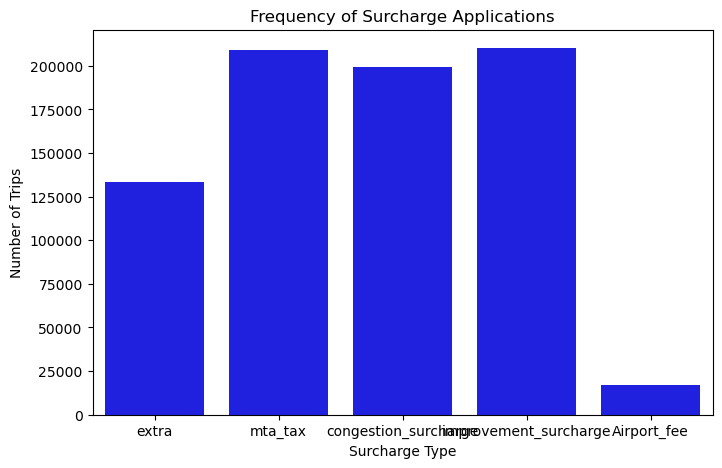

In [356]:
# How often is each surcharge applied?

# Select surcharge-related columns
surcharge_cols = ["extra", "mta_tax", "congestion_surcharge", "improvement_surcharge", "Airport_fee"]

# Count how often each surcharge is applied
surcharge_counts = df[surcharge_cols].apply(lambda x: (x > 0).sum())

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_counts.index, y=surcharge_counts.values, color="b")
plt.title("Frequency of Surcharge Applications")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1.Peak Hour Allocation:

The highest demand is between 12 AM - 2 AM and 8 PM - 11 PM.
More taxis should be dispatched during these peak hours, especially near nightlife areas, business districts, and residential zones.
Ensure availability at morning hours (8 AM - 10 AM) for office commuters.

2.Reducing Inefficiencies During Low-Demand Hours:

The lowest demand occurs between 4 AM - 7 AM, indicating that cabs may be underutilized.
During this period, taxis should be repositioned near airports, hospitals, and transit hubs, where late-night or early-morning trips are more likely.
Reduce unnecessary fleet allocation in areas with minimal demand.

3.Day-Wise Fleet Distribution:

Saturdays and Sundays have the highest passenger counts, meaning a larger fleet should be deployed in high-footfall areas such as shopping districts, entertainment hubs, and tourist spots.
Wednesdays and Tuesdays have the lowest demand, so fewer taxis should be active, or drivers can be encouraged to work on high-demand days.

4.Dynamic Dispatching Strategy:

Weekday Mornings: Prioritize taxi dispatching to business districts and office areas.
Weekday Evenings: Shift focus to residential areas, malls, and entertainment zones.
Weekends: Increase supply in recreational zones, nightlife areas, and event venues.

5.Consider Demand-Based Pricing:

Introduce higher fares (surge pricing) during peak hours (midnight, evening rush).
Offer discounts or incentives for low-demand hours (early morning, mid-day on weekdays) to balance demand.

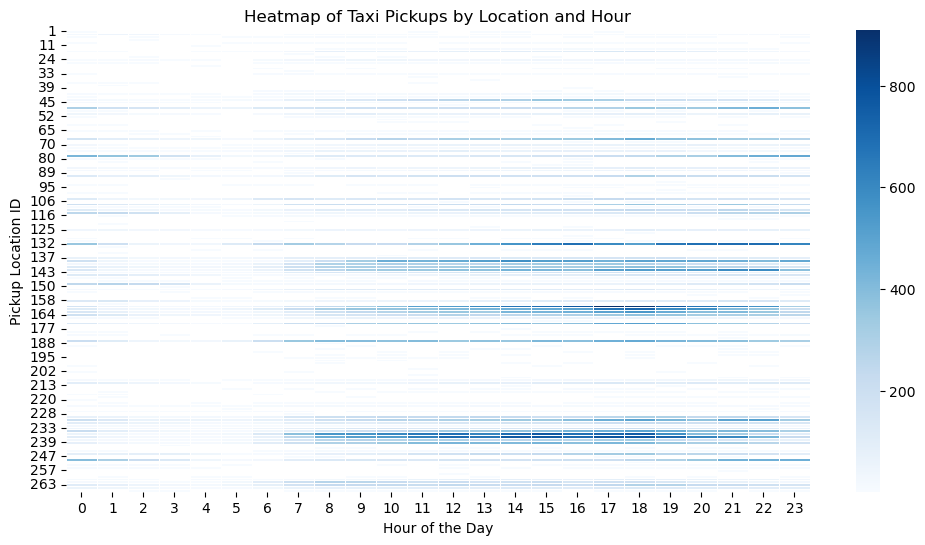

In [365]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

pickup_heatmap = df.groupby(['PULocationID', 'pickup_hour']).size().unstack()


plt.figure(figsize=(12, 6))
sns.heatmap(pickup_heatmap, cmap="Blues", linewidths=0.5)

plt.title("Heatmap of Taxi Pickups by Location and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Location ID")
plt.show()

/var/folders/sz/hbj2c0f17fl3z8xylh2w9q4c0000gn/T/ipykernel_42155/545236802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette="Blues_r")


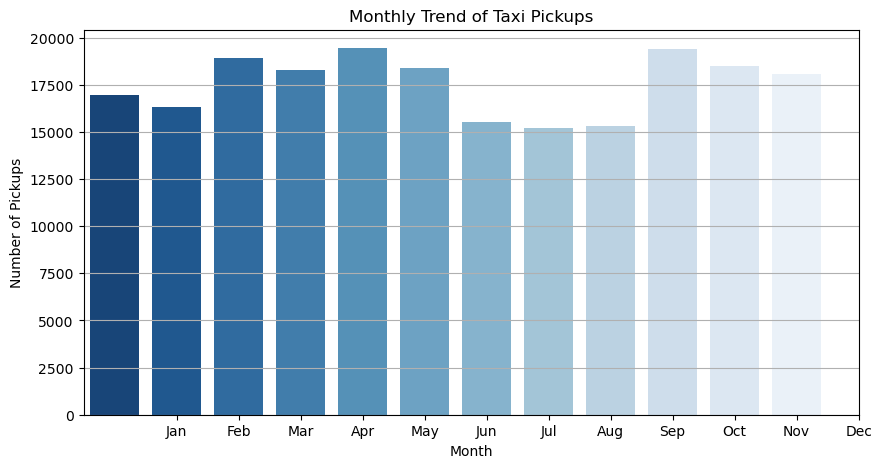

In [367]:
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month


monthly_trips = df['pickup_month'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette="Blues_r")

plt.title("Monthly Trend of Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis='y')
plt.show()


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Suggestions for Cab Positioning
1.Peak Hours vs. Off-Peak Allocation

 Increase cab presence in high-demand areas during peak hours (identified in the heatmap).
 Reduce idle cabs by repositioning them during off-peak hours to transit hubs, airports, and railway stations.
2.High-Demand Locations by Time of Day

 Morning (5 AM - 10 AM): Place cabs near residential areas, business hubs, and airports for office and travel rush.
 Afternoon (12 PM - 3 PM): Allocate more cabs in shopping districts and tourist spots where mid-day travel occurs.
 Evening (5 PM - 11 PM): Deploy cabs to nightlife areas, restaurants, and entertainment zones to capture the high evening demand.
3.Seasonal Fleet Adjustments

 January - May: Increase cab supply as demand is high (business travel, winter tourism).
 June - December: Reduce the fleet or provide promotions to boost ridership.
 Monitor demand dips and surges to plan special pricing strategies (e.g., holiday surges).
4.Rebalancing Fleet Across Zones

 Night-time Repositioning: Move idle taxis from low-demand residential areas to airports, transit hubs, and business districts for late- night and early-morning travelers.
 Weekend Allocation: Increase cab presence in tourist areas, shopping centers, and nightlife hotspots on Saturdays and Sundays.
 Weekday Adjustments: Focus on corporate areas and commuter routes on weekdays, reducing excess cabs in leisure areas.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

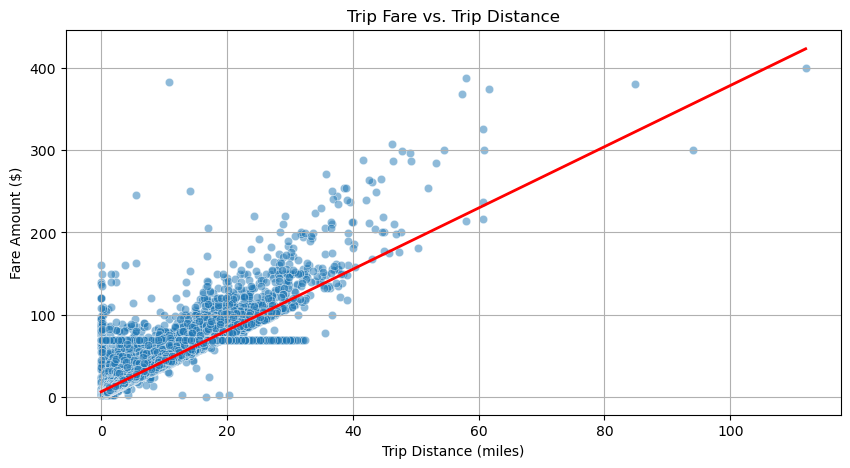

In [375]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5)

# Fit a regression line
sns.regplot(x=df['trip_distance'], y=df['fare_amount'], scatter=False, color='red', line_kws={"linewidth":2})

plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


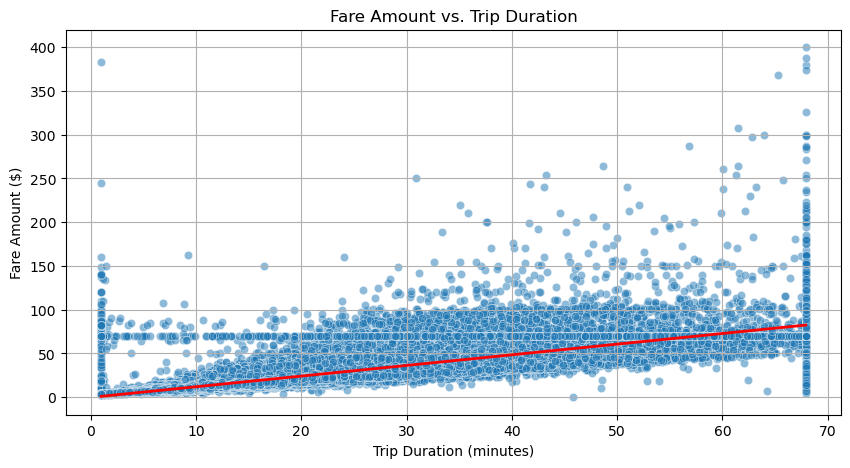

In [377]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_duration'], y=df['fare_amount'], alpha=0.5)

# Fit a regression line
sns.regplot(x=df['trip_duration'], y=df['fare_amount'], scatter=False, color='red', line_kws={"linewidth":2})

plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


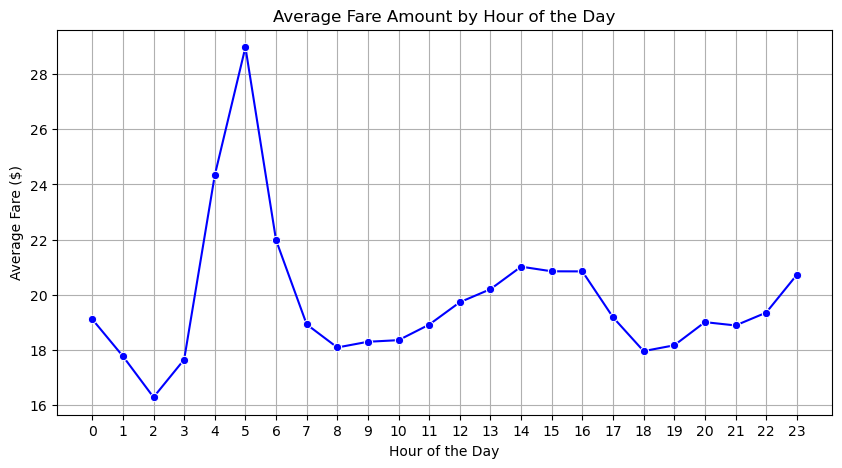

In [379]:
# Extract hour from datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Average fare per hour
avg_fare_per_hour = df.groupby('pickup_hour')['fare_amount'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_per_hour.index, y=avg_fare_per_hour.values, marker='o', color='b')

plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare ($)')
plt.xticks(range(24))
plt.grid()
plt.show()


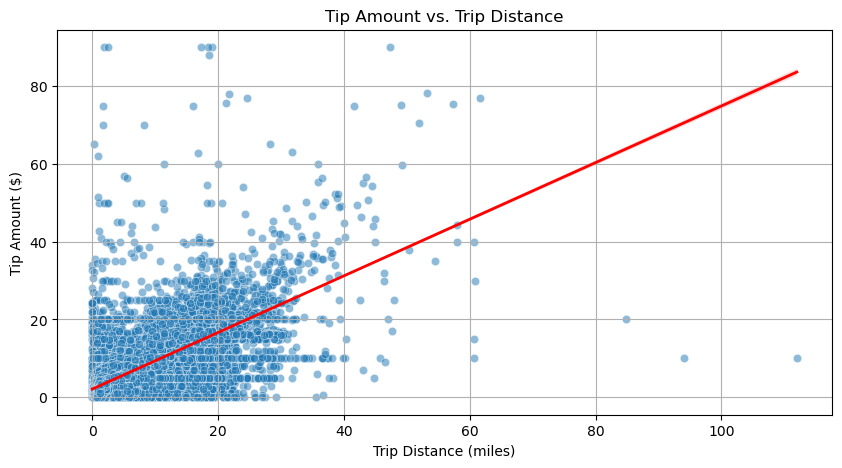

In [381]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_distance'], y=df['tip_amount'], alpha=0.5)

sns.regplot(x=df['trip_distance'], y=df['tip_amount'], scatter=False, color='red', line_kws={"linewidth":2})

plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()


Recommended Adjustments to Pricing Strategy
1. Implement Distance-Based Fare Optimization

Increase fares for long-distance trips that are currently underpriced.
Reduce base fare and increase per-mile charges to make pricing more dynamic.
Introduce flat-rate pricing for popular long routes like airports, business hubs, or major transit stations.

2. Time-Based Surge Pricing Adjustments

Early Morning (4 AM - 7 AM): Fares are already high, no change needed.
Mid-day (8 AM - 3 PM): Offer discounted fares to increase demand.
Evening (5 PM - 11 PM): Apply moderate surge pricing in high-traffic zones (restaurants, shopping centers).
Late Night (12 AM - 3 AM): Increase fares due to higher demand in nightlife areas.

3. Introduce Congestion-Based Pricing

Implement waiting-time charges during peak traffic hours (8 AM - 10 AM, 5 PM - 7 PM).
Offer express ride pricing with minimal waiting time to compete with ride-hailing apps.

4. Adjust Pricing for High-Tip Routes

Encourage longer trips by offering a 5% discount after a certain distance, as tips are higher on long trips.
Short-distance fares should be slightly increased to compensate for lower tips.